# Package

In [227]:
import pandas as pd
import numpy as np
import chardet
import xlrd
import os
import zipfile
from os import listdir
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

---------

# Importation des fichiers

### Fonctions pour gérer les Path et extraires les zip

In [228]:
run = 0
if run == 0:
    mainPath = os.getcwd()
    run += 1
mainPath

'/Users/manulabricole/Documents/CDN/CDN_Statistique-I/Notebooks'

In [229]:
# Go to data folder based on mainPath
def get_data_dir():
    os.chdir(mainPath)
    # Go one level Up
    tempPath = os.path.dirname(mainPath)
    tempPath = os.path.join(tempPath, 'data/')
    os.chdir(tempPath)
    return tempPath
dataPath = get_data_dir()

In [230]:
def extract_file(path, targetDir):
    os.chdir(path)
    with zipfile.ZipFile('data_rte.zip', 'r') as zip_ref:
        print(f"Main Zip contain {len(zip_ref.namelist())} .zip files to open")
        
        zip_ref.extractall(targetDir)
        newPath = os.path.join(path, targetDir + '/data_rte')
        os.chdir(newPath)
        return newPath

In [231]:
def get_list_of_df_from_zip(path):
    os.chdir(path)
    newPath = extract_file(path, "rawData")
    files = os.listdir(newPath)
    
    dfListNational = []
    dfListRegional = []
    i = 0
    
    print("oui")
    for file in files:
        print("----------------------------------------------------------------------")
        extensionTemp = os.path.splitext(file)[1]
        with zipfile.ZipFile(file, 'r') as tempZipFile:
            fileName = tempZipFile.namelist()
            print(fileName[0])
            with zipfile.ZipFile(file, 'r').open(fileName[0], 'r') as f:
                i+=1
                
                if "2019" in fileName[0] or "2020" in fileName[0]:
                    pass
                    print("DATAFRAME IGNORED --> 2029 ou 2020 wrong columns")
                    
                else:
                    pass
                    dfTemp = pd.read_csv(f, encoding='ISO-8859-1', error_bad_lines=False,sep='\t', index_col=False)
                    #
                    if "RTE_Annuel" in fileName[0]:
                        dfListNational.append(dfTemp)
                        print("--> ANNUAL")
                    else:
                        print("--> REGIONAL")
                        dfListRegional.append(dfTemp)
                
                print(f"{i} / {len(files)} treated")
                    
    print("----> END <-----")
    os.chdir(mainPath)
    return dfListNational, dfListRegional

### Extraction et stockage des df

In [232]:
nationalList, regionalList = get_list_of_df_from_zip(dataPath)

Main Zip contain 105 .zip files to open
oui
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2016.xls
--> REGIONAL
1 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2016.xls
--> REGIONAL
2 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Bourgogne-Franche-Comté_Annuel-Definitif_2013.xls
--> REGIONAL
3 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2017.xls


/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_7083/1489893886.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  nationalList, regionalList = get_list_of_df_from_zip(dataPath)


--> REGIONAL
4 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2017.xls
--> REGIONAL
5 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_PACA_Annuel-Definitif_2013.xls
--> REGIONAL
6 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Ile-de-France_Annuel-Definitif_2015.xls
--> REGIONAL
7 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Pays-de-la-Loire_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
8 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Grand-Est_Annuel-Definitif_2015.xls
--> REGIONAL
9 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Nouvelle-Aquitaine_Annuel-Definitif_2018.xls
--> REGIONAL
10 / 105 treated
---------------------------

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_7083/1489893886.py:1: DtypeWarning: Columns (18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  nationalList, regionalList = get_list_of_df_from_zip(dataPath)


--> REGIONAL
58 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Annuel-Definitif_2016.xls
--> ANNUAL
59 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2015.xls
--> REGIONAL
60 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
61 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Hauts-de-France_Annuel-Definitif_2018.xls
--> REGIONAL
62 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Occitanie_Annuel-Definitif_2020.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
63 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2014.xls
--> REGIONAL
6

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_7083/1489893886.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  nationalList, regionalList = get_list_of_df_from_zip(dataPath)


--> ANNUAL
72 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2016.xls
--> REGIONAL
73 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2014.xls
--> REGIONAL
74 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2018.xls
--> REGIONAL
75 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Centre-Val-de-Loire_Annuel-Definitif_2013.xls
--> REGIONAL
76 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Auvergne-Rhône-Alpes_Annuel-Definitif_2019.xls
DATAFRAME IGNORED --> 2029 ou 2020 wrong columns
77 / 105 treated
----------------------------------------------------------------------
eCO2mix_RTE_Normandie_Annuel-Definitif_2015.xls
--> REGIONAL
78 / 105 treated
----------

-------

# Première analyse - Forme des données

In [233]:
def check_shape(dfList):
    for file in dfList:
        if len(file.columns) != len(dfList[0].columns):
            print("Not same size")
            return False
        else:
            print(f"Homogene dataframe --> {len(file.columns)} columns")
            return True

In [234]:
def filter_RTE_rows(df):
    valuePerimetreName = df["Périmètre"].value_counts().index.tolist()
    mask = df["Périmètre"].str.contains("RTE")
    
    if len(mask.value_counts()) == 1:
        print("Already Parsed ")
        pass
    
    new_df = df[~mask]

    print(valuePerimetreName)
    return new_df


In [235]:
def add_datetime_index(df):
    try:
        df["datetime"] = pd.to_datetime(df['Date'] + ' ' + df['Heures'].astype(str))
        df.set_index('datetime', inplace=True)
        df.drop(["Date", "Heures"], axis=1, inplace=True)
    except:
        print("Already done")

In [236]:
def build_df():
    if check_shape(nationalList):
        df_national = pd.concat(el for el in nationalList)
    if check_shape(regionalList):
        df_regional = pd.concat(el for el in regionalList)
        if len(df_regional.columns) > 13:
            # Remove the col 14 that is wrong
            df_regional = df_regional.drop(df_regional.columns[-1], axis=1)
    return df_regional, df_national

In [237]:
nationalDfCheck = check_shape(nationalList)
regionalDfCheck = check_shape(regionalList)

Homogene dataframe --> 36 columns
Homogene dataframe --> 14 columns


In [238]:
df_regional, df_national = build_df()

Homogene dataframe --> 36 columns
Homogene dataframe --> 14 columns


In [239]:
# df_regional.head(5)
# df_national.head(5)
# df_regional.tail(5)
# df_national.tail(5)

In [240]:
df_national = filter_RTE_rows(df_national)
df_regional = filter_RTE_rows(df_regional)

['France', "RTE ne pourra être tenu responsable de l'usage qui pourrait être fait des données mises à disposition, ni en cas de prévisions qui se révèleraient imprécises."]
['Ile-de-France', 'Grand-Est', 'Bourgogne-Franche-Comté', 'PACA', 'Nouvelle-Aquitaine', 'Pays-de-la-Loire', 'Bretagne', 'Normandie', 'Auvergne-Rhône-Alpes', 'Occitanie', 'Hauts-de-France', 'Centre-Val de Loire', "RTE ne pourra être tenu responsable de l'usage qui pourrait être fait des données mises à disposition, ni en cas de prévisions qui se révèleraient imprécises."]


In [241]:
add_datetime_index(df_national)
add_datetime_index(df_regional)

# Dataset National

1. Dataset national
    - Tracer la consommation nationale en fonction du temps
    - Tracer la production des différentes sources. Quelle est la source de production largement majoritaire ?
    - Afficher sur un même graphique : la production nucléaire, la consommation et la somme des échanges aux frontières. En déduire la signification du signe des échanges (positif ou négatif) ?
    - Quelles sources ont un fonctionnement
        - de "base" (production régulière) ?
        - de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

 <br/>

#### Plot style

In [242]:
colors = sns.color_palette('rocket', n_colors=12)
sns.set_style("darkgrid")
colors

[(0.1125315, 0.06742194, 0.17414848),
 (0.22741085, 0.10140876, 0.25340813),
 (0.34940101, 0.11863987, 0.3138355),
 (0.47114798, 0.12098721, 0.34787978),
 (0.60444226, 0.10573912, 0.35820487),
 (0.73669146, 0.08704683, 0.33543669),
 (0.84335441, 0.14556683, 0.28480819),
 (0.91978131, 0.27526191, 0.24245973),
 (0.95001704, 0.42771398, 0.29244728),
 (0.96077819, 0.55997184, 0.39941173),
 (0.96479861, 0.68910113, 0.53756026),
 (0.9698028, 0.80981139, 0.70252255)]

#### Clean dataset

In [243]:
colEnergy = [
    "Consommation", "Fioul", "Charbon", 
    "Gaz", "Nucléaire", "Eolien", "Solaire", 
    "Hydraulique", "Pompage", "Bioénergies"
]

In [244]:
df_n_E = df_national.copy()
df_n_E = df_n_E[colEnergy]
print(f"Before cleaning --> {df_n_E.shape[0]} rows")
df_n_E.dropna(axis=0, inplace=True)
print(f"After cleaning --> {df_n_E.shape[0]} rows")
df_n_E.sort_index(inplace=True)

Before cleaning --> 245472 rows
After cleaning --> 122736 rows


## Etude de la consomation au cours du temps

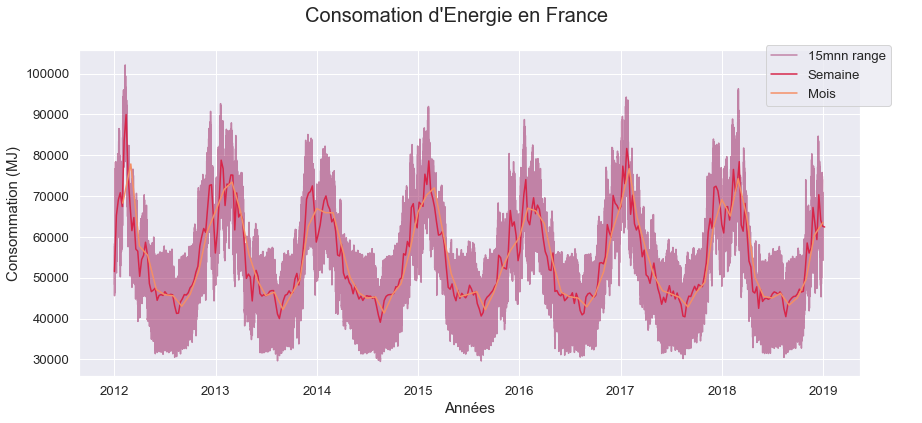

In [245]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Consomation d'Energie en France", fontsize=20)
ax = fig.subplots()

ax = sns.lineplot(
    x=df_n_E.index, 
    y=df_n_E["Consommation"].values,
    color=colors[4],
    alpha=.5
)
ax = sns.lineplot(
    x=df_n_E.resample("W").mean().index, 
    y=df_n_E["Consommation"].resample("W").mean().values,
    color=colors[6]
)
ax = sns.lineplot(
    x=df_n_E.resample("M").mean().index, 
    y=df_n_E["Consommation"].resample("M").mean().values,
    color=colors[9]
)

ax.set_xlabel("Années", loc="center", fontsize=15)
ax.set_ylabel("Consommation (MJ)", loc="center", fontsize=15)#, c=colors[color1])
fig.legend(["15mnn range", "Semaine", "Mois"],loc=(0.83, 0.75))

-----

-------

## Etude des 8 années

In [246]:
df = df_n_E.copy()
df_weekly = df.resample('W').mean()

# add week number column
# Convert UINT32 into float otherwise graph won't work
df_weekly['week_number'] = df_weekly.index.week
df_weekly['year'] = df_weekly.index.year
df_weekly['mov_avg'] = df_weekly['Consommation'].rolling(7).sum().astype(float)

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_7083/1196181914.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_weekly['week_number'] = df_weekly.index.week


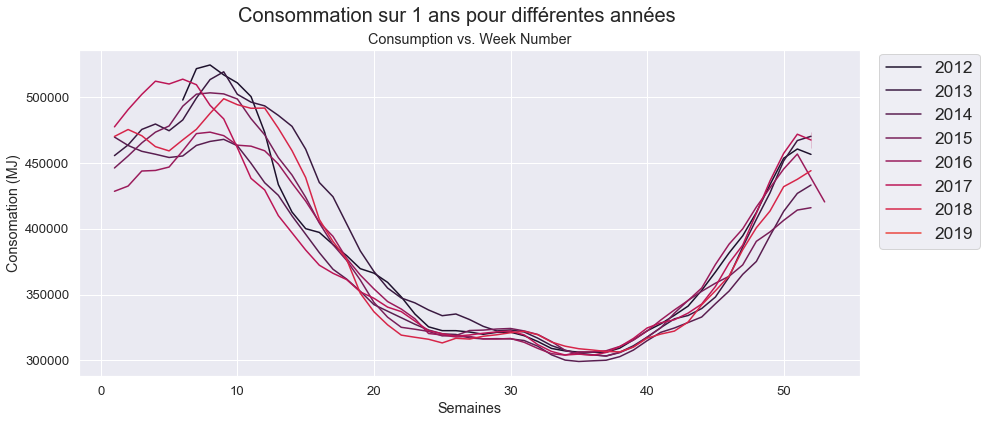

In [247]:
sns.set_style("darkgrid")
sns.set_palette('rocket', n_colors=12)

fig = plt.figure(figsize=(14, 6))
fig.suptitle("Consommation sur 1 ans pour différentes années", fontsize=20)
ax = fig.subplots()

sns.lineplot(
    ax=ax,
    x='week_number', 
    y="mov_avg", 
    hue="year", 
    data=df_weekly, 
    estimator=np.mean,
    palette=colors[0:df_weekly["year"].nunique()]
)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.2, fontsize="large")

# set the plot title and axis labels
plt.title('Consumption vs. Week Number')
plt.xlabel('Semaines')
plt.ylabel('Consomation (MJ)')

# show the plot
plt.show()

-------

-------

## Tracer la production des différentes sources

In [248]:
source = ["Fioul", "Charbon", "Gaz", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Pompage", "Bioénergies"]
df_monthly = df.resample('M').mean()

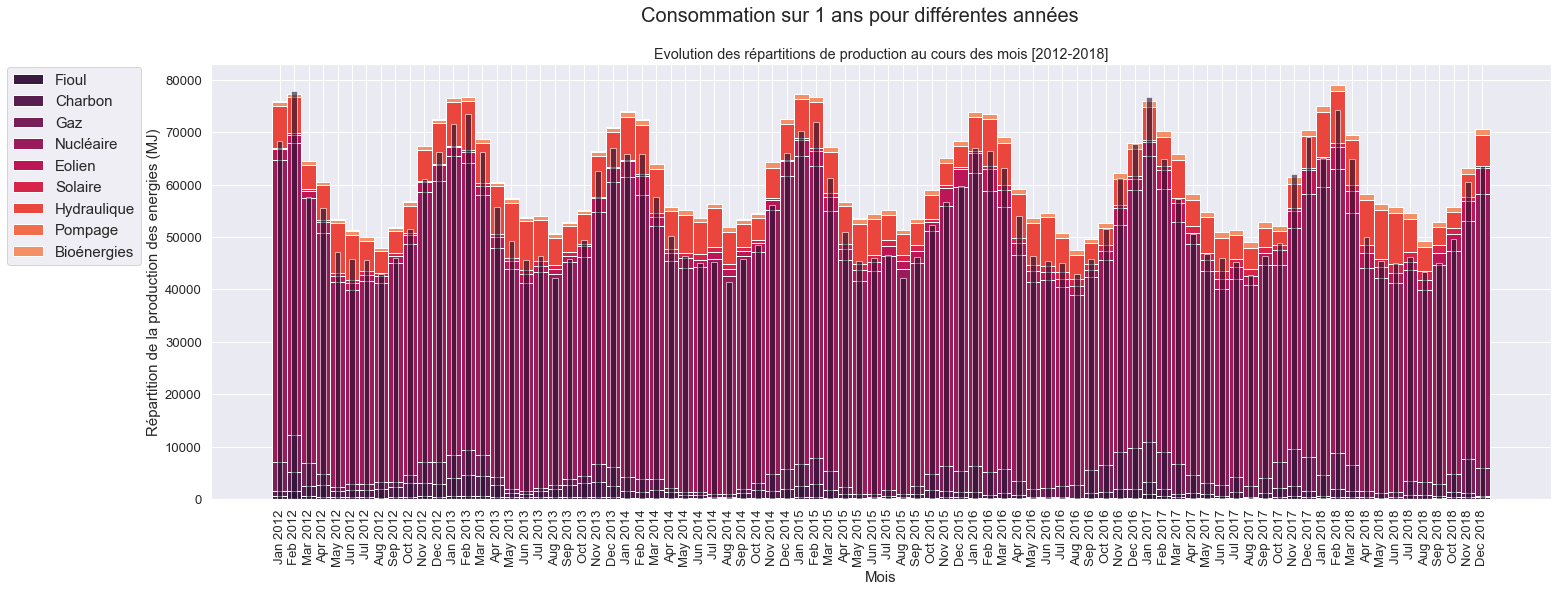

In [274]:
fig, ax = plt.subplots(figsize=(24, 8))
fig.suptitle("Consommation sur 1 ans pour différentes années", fontsize=20)

width = 1

# First chart
x1 = df_monthly.index.strftime('%b %Y')

for i, fuel in enumerate(source):
    ax.bar(
        x1, 
        df_monthly[fuel], 
        width=1, 
        bottom=df_monthly[source[:i]].sum(axis=1), 
        color=colors[i+1],
        alpha=1,
        label=fuel)
    
# Second chart
x2 = x1
ax.bar(
    x2, 
    df_monthly['Consommation'], 
    width=0.4, 
    color=colors[0], 
    alpha=0.6)

    
ax.set_xlabel('Mois', fontsize=15)
ax.set_ylabel('Répartition de la production des energies (MJ)', fontsize=15)
ax.set_title('Evolution des répartitions de production au cours des mois [2012-2018]')

# Handle y legend    
ax.legend(bbox_to_anchor=(-.05, 1), loc=1, borderaxespad=0.2, fontsize=15)

# create a list of tick positions and labels
tick_pos = range(len(df_monthly.index))
tick_labels = x1

# set the tick positions and labels
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels, rotation=90)
#ax.set_xlim(xMin, xMax)

# display the plot
plt.show()

---------

------

## Afficher : La production nucléaire | Consommation | Somme des échanges aux frontières

#### En déduire la signification du signe des échanges (positif ou négatif) ?

In [250]:
#df_national

In [251]:
col= ["Consommation", "Nucléaire",'Ech. physiques',
       'Taux de Co2', 'Ech. comm. Angleterre', 'Ech. comm. Espagne',
       'Ech. comm. Italie', 'Ech. comm. Suisse',
       'Ech. comm. Allemagne-Belgique']
echangeCol = ['Ech. comm. Angleterre', 'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse', 'Ech. comm. Allemagne-Belgique']

#### Prepare the dataframe

In [268]:
df_echange = df_national[col]
df_echange=df_echange.replace("ND", np.nan)
df_echange.dropna(axis=0, inplace=True)
df_echange=df_echange.astype(float)

In [269]:
df_echange["Echange Sum"] = df_echange[echangeCol].sum(axis=1)

In [270]:
#df_echange.resample("M").mean()

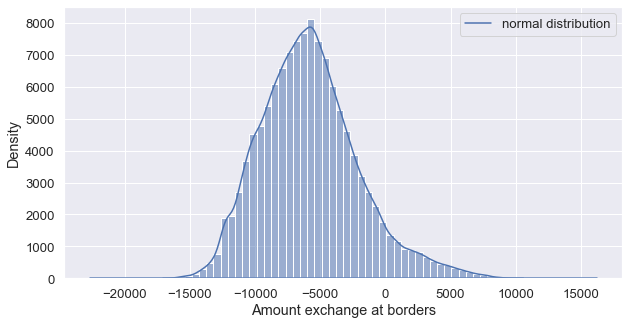

In [271]:
data = df_echange["Echange Sum"]
# plot histogram and normal distribution using Seaborn
sns.histplot(data=data, bins=50, kde=True)
sns.kdeplot(data=data, bw_method=0.5, label='normal distribution')

# add labels and legend
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})
sns.set(font_scale=1.2)
plt.xlabel('Amount exchange at borders')
plt.ylabel('Density')
plt.legend()
plt.show()

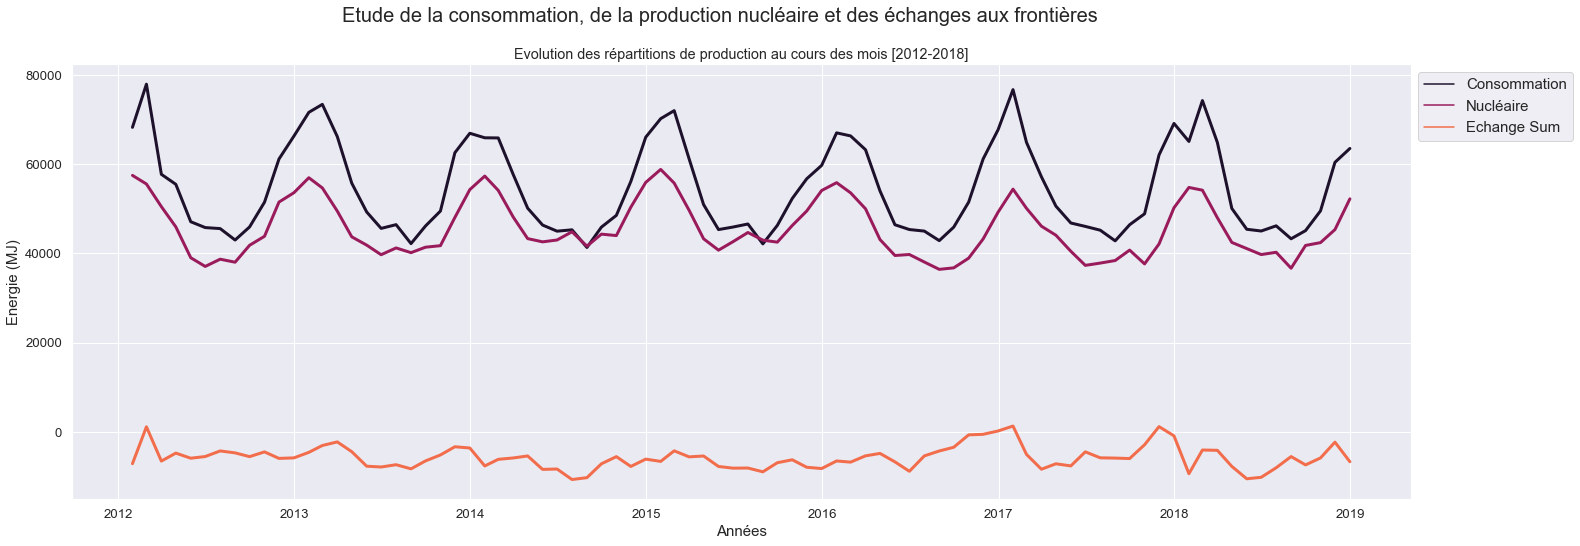

In [291]:
data = df_echange.resample("M").mean()

fig, ax = plt.subplots(figsize=(24, 8))
fig.suptitle("Etude de la consommation, de la production nucléaire et des échanges aux frontières", fontsize=20)


sns.lineplot(
    data=data[["Consommation", "Nucléaire", "Echange Sum"]], 
    ax=ax,
    palette=colors[0:12:4],
    dashes=False,
    linewidth=3
    
)
ax.set_xlabel('Années', fontsize=15)
ax.set_ylabel('Energie (MJ)', fontsize=15)
ax.set_title('Evolution des répartitions de production au cours des mois [2012-2018]')

# Handle y legend    
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5, fontsize=15)
plt.show()

-----

------

## Quelles sources ont un fonctionnement de "base" (production régulière) ? de "pointe" (production ponctuelle, uniquement lorsque la base ne suffit plus) ?

In [303]:
df_fonction = df_national[source].dropna(axis=0)

In [304]:
df_fonction = (df_fonction - df_fonction.mean())/df_fonction.std()
df_fonction=df_fonction.resample("M").mean()

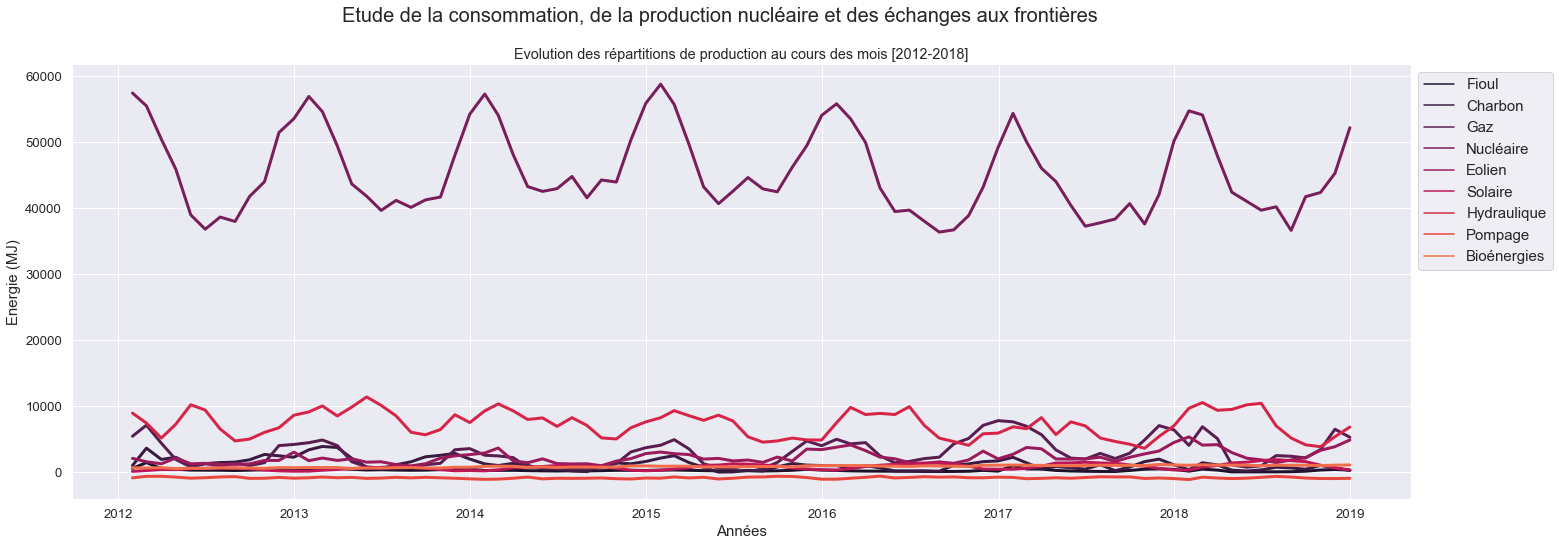

In [308]:
df_fonction = df_national[source].dropna(axis=0).resample("M").mean()
data = df_fonction
fig, ax = plt.subplots(figsize=(24, 8))
fig.suptitle("Etude de la consommation, de la production nucléaire et des échanges aux frontières", fontsize=20)


sns.lineplot(
    data=data, 
    ax=ax,
    palette=colors[0:len(data.columns)],
    dashes=False,
    linewidth=3
    
)
ax.set_xlabel('Années', fontsize=15)
ax.set_ylabel('Energie (MJ)', fontsize=15)
ax.set_title('Evolution des répartitions de production au cours des mois [2012-2018]')

# Handle y legend    
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5, fontsize=15)
plt.show()

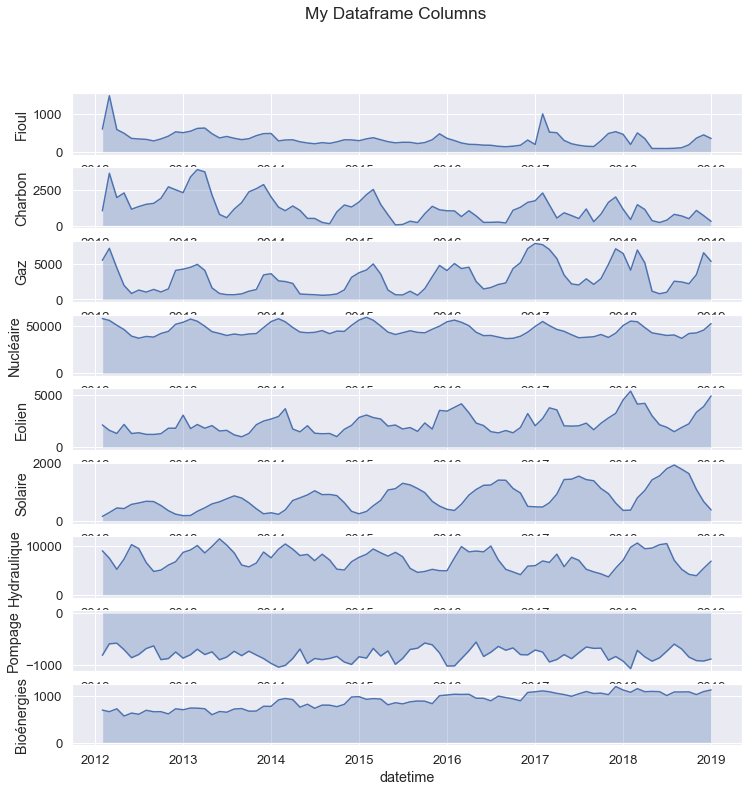

In [312]:
df = df_fonction

# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=df.shape[1], ncols=1, figsize=(12, 12))

# Iterate over each column and plot it on its corresponding subplot
for i, col in enumerate(df.columns):
    sns.lineplot(data=df[col], ax=axes[i])
    axes[i].fill_between(df.index, df[col], alpha=0.3)

# Add a common title to the whole figure
fig.suptitle('My Dataframe Columns')

# Show the figure
plt.show()